In [2]:
%load_ext autoreload
%autoreload

In [1]:
from IPython.core.debugger import set_trace
from io import StringIO
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
import math
import missingno as msno
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.ensemble import IsolationForest
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    display.precision = 7  # set as needed

set_pandas_display_options()

In [3]:
trainDf = pd.read_csv('train.csv')
trainDf.replace("nan", np.nan, inplace=True)

testDf = pd.read_csv('test.csv')
testDf.replace("nan", np.nan, inplace=True)

display(trainDf.shape)
display(testDf.shape)

(1460, 81)

(1459, 80)

In [7]:
ntrain = trainDf.shape[0]
ntest = testDf.shape[0]
y_train = trainDf['SalePrice'].values
all_data = pd.concat((trainDf, testDf)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print(f"all_data size is : {all_data.shape}")
#all_data.info()

all_data size is : (2919, 80)


In [10]:
# List the features having missing values
feat_w_missing_values_list = all_data.columns[all_data.isna().any()].tolist()

print(f"Features with missing values : {len(feat_w_missing_values_list)}\n\n{feat_w_missing_values_list}")

# percentage of missing values
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

Features with missing values : 34

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


,Total,Percent
PoolQC,2909,99.657
MiscFeature,2814,96.403
Alley,2721,93.217
Fence,2348,80.439
FireplaceQu,1420,48.647
LotFrontage,486,16.650
GarageCond,159,5.447
GarageQual,159,5.447
GarageYrBlt,159,5.447
GarageFinish,159,5.447


Text(0.5, 1.0, 'Percent missing data by feature')

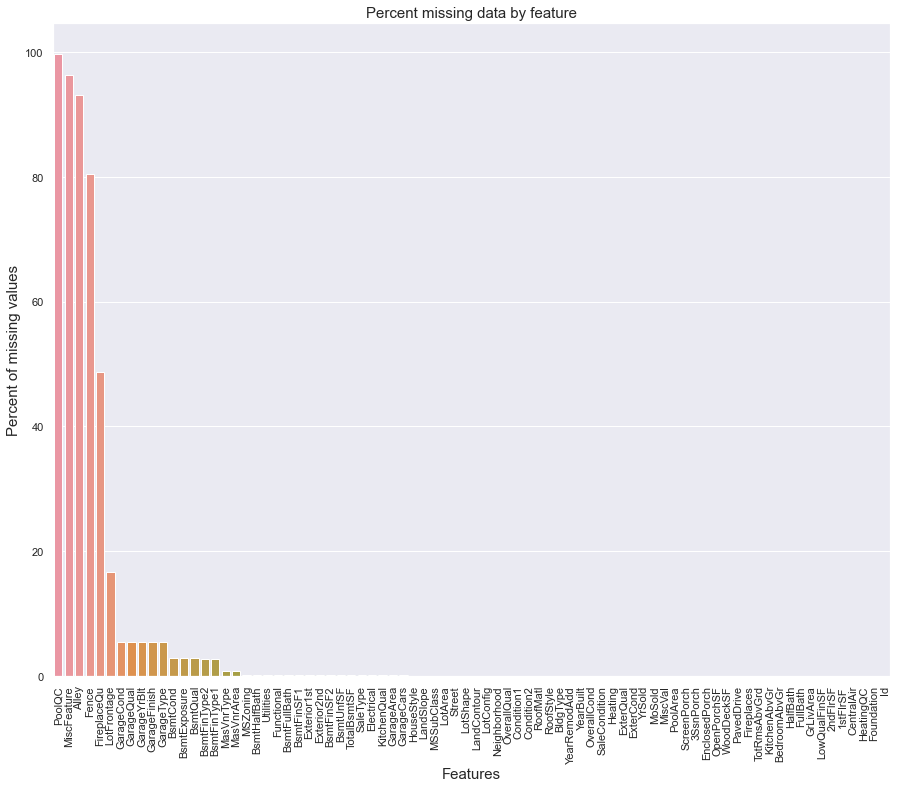

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)